# Logistic Regression 

Statistical method for analyzing datasets in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict the probability of a binary event occurring, such as pass/fail, win/lose, alive/dead.

**Importing the Libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = sns.load_dataset("titanic")

## Perform EDA 
Here are some of the fetures of the dataset 

* `Survived`: A binary variable indicating whether the passenger survived (1 = Yes, 0 = No).
* `Pclass`: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
* `Sex`: Gender of the passenger.
* `Age`: Age of the passenger.
* `SibSp`: Number of siblings/spouses aboard.
* `Parch`: Number of parents/children aboard.
* `Fare`: Passenger fare.
* `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [60]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Lets take a look at a few features 

<AxesSubplot: xlabel='age', ylabel='Density'>

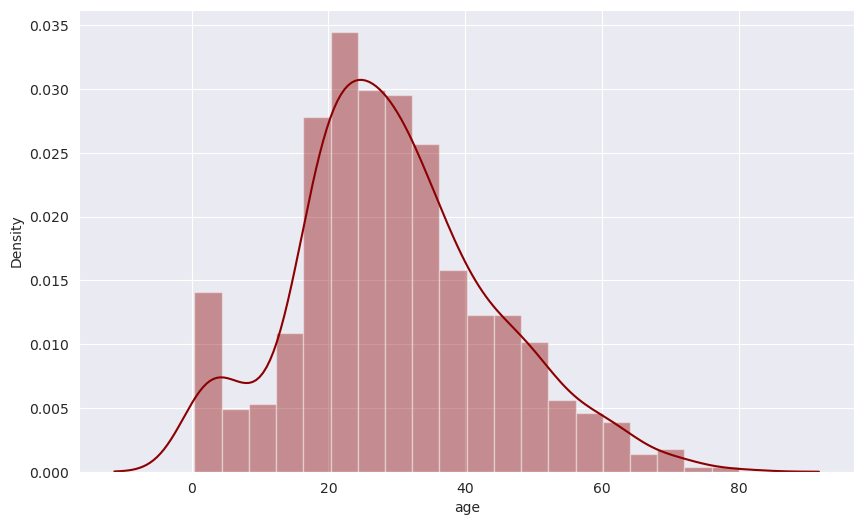

In [61]:
plt.figure(figsize = (10, 6))
sns.distplot(df["age"], color = "darkred")

<AxesSubplot: xlabel='fare', ylabel='Density'>

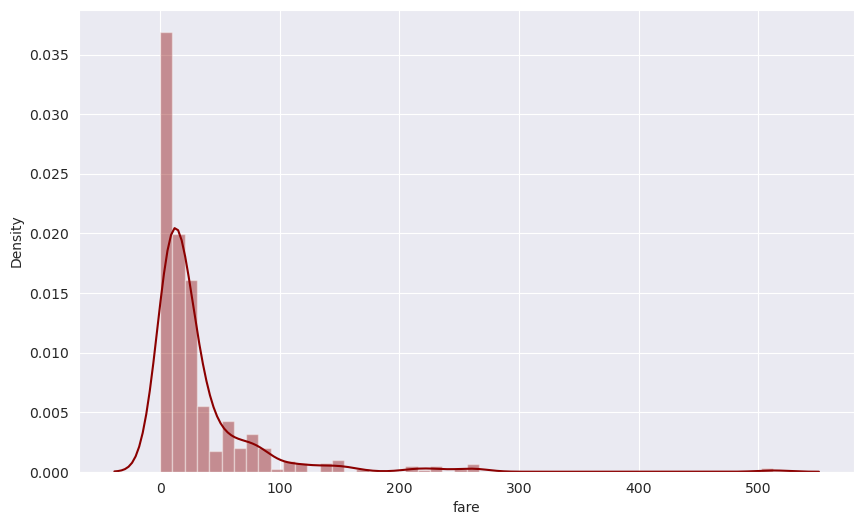

In [62]:
plt.figure(figsize = (10, 6))
sns.distplot(df["fare"], color = "darkred")

<AxesSubplot: xlabel='pclass', ylabel='Count'>

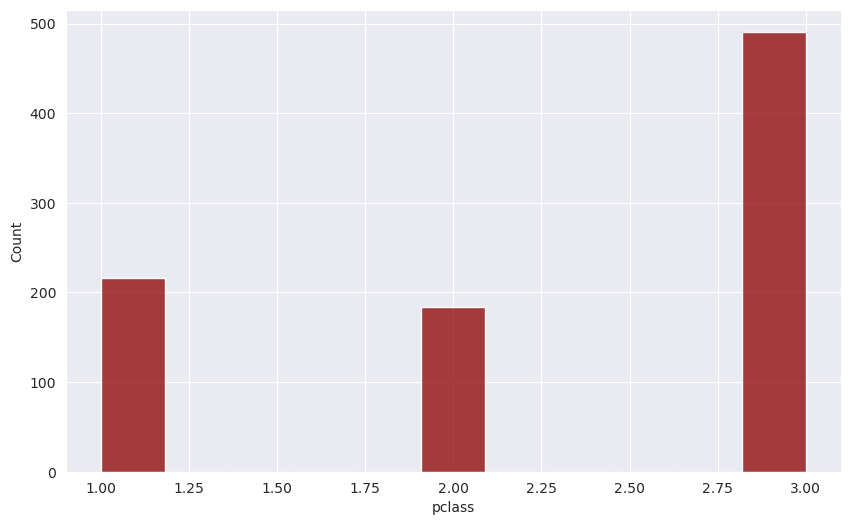

In [63]:
plt.figure(figsize = (10, 6))
sns.histplot(df["pclass"], color = "darkred")

<AxesSubplot: xlabel='who', ylabel='Count'>

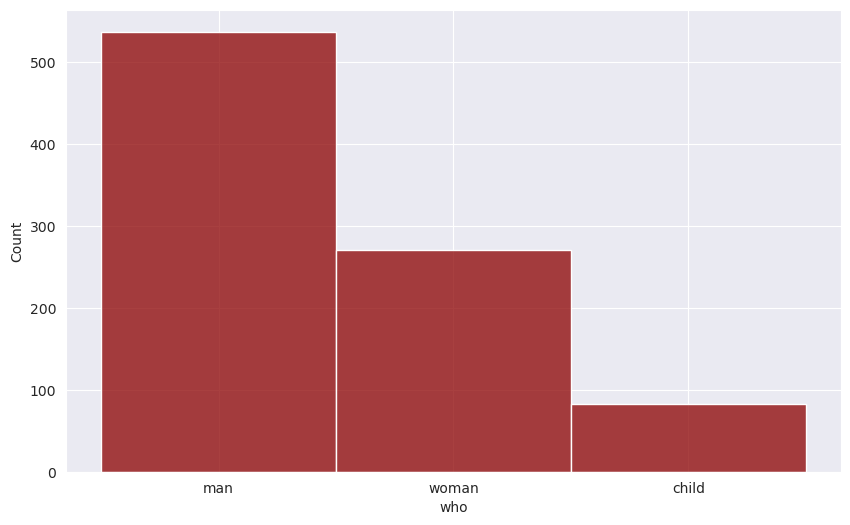

In [64]:
plt.figure(figsize = (10, 6))
sns.histplot(df["who"], color = "darkred")

<AxesSubplot: xlabel='sex', ylabel='Count'>

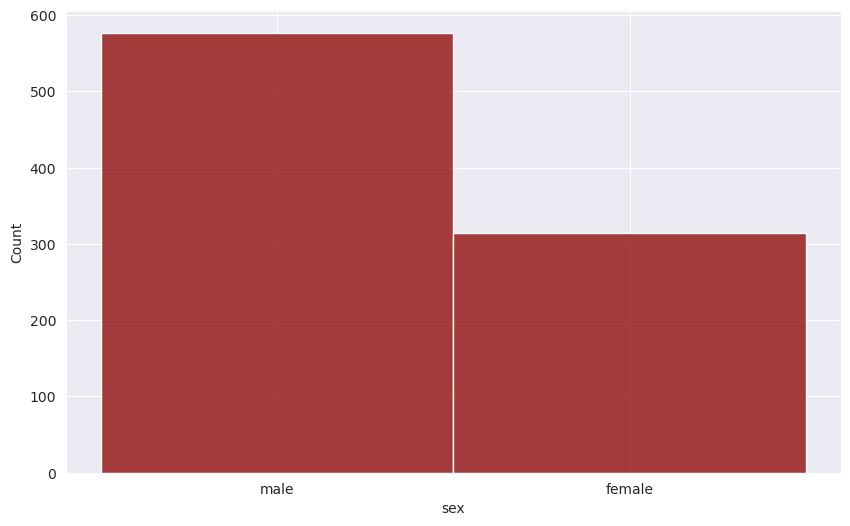

In [65]:
plt.figure(figsize = (10, 6))
sns.histplot(df["sex"], color = "darkred")

Lets take a look at the children 

In [66]:
print(df["sex"].unique())
print(df["who"].unique())

['male' 'female']
['man' 'woman' 'child']


In [67]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [68]:
df[df["who"]=='child'].isna().sum()

survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
deck           70
embark_town     0
alive           0
alone           0
dtype: int64

In [69]:
children = df[df['who'] == 'child']
male_children = children[children['sex'] == "male" ] 
female_children = children[children['sex'] == "female"]  
print("Male Chilren: \n")
print(male_children.isna().sum())
print("\nFemale Chilren: \n")


Male Chilren: 

survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
deck           33
embark_town     0
alive           0
alone           0
dtype: int64

Female Chilren: 



In [70]:
print(female_children.isna().sum())

survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
deck           37
embark_town     0
alive           0
alone           0
dtype: int64


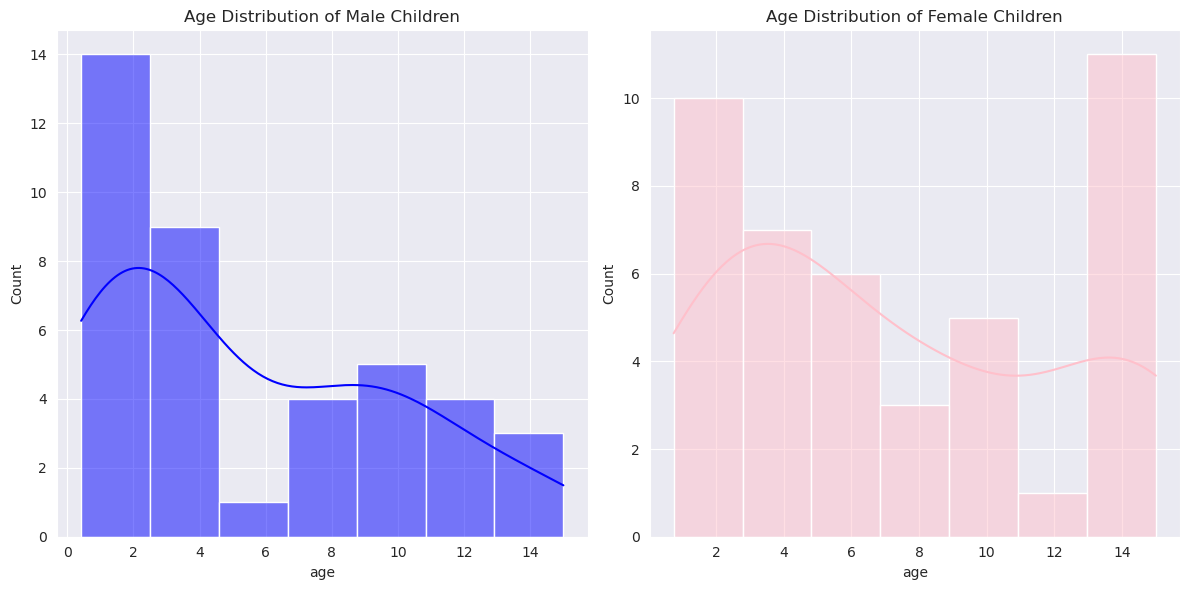

In [71]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(male_children['age'], kde=True, color='blue')
plt.title('Age Distribution of Male Children')


plt.subplot(1, 2, 2)
sns.histplot(female_children['age'], kde=True, color='pink')
plt.title('Age Distribution of Female Children')

plt.tight_layout()
plt.show()


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Lets clean up the Deck as we have a over 600 missing datapoints. 

<AxesSubplot: xlabel='deck', ylabel='count'>

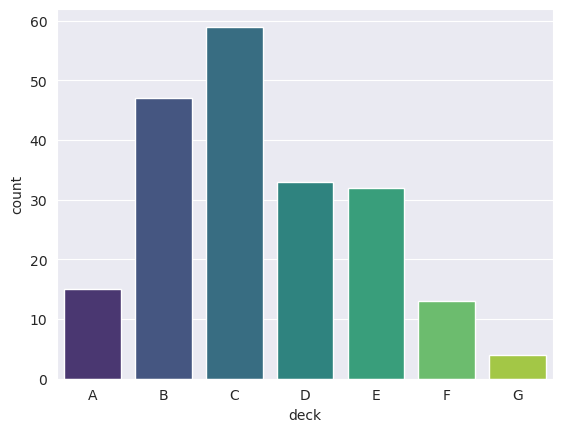

In [73]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis")

<AxesSubplot: xlabel='deck', ylabel='count'>

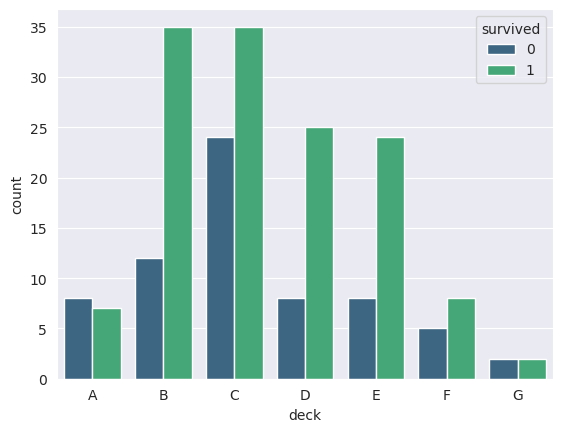

In [74]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", hue= "survived", data = df, palette = "viridis")

In [75]:
#Looking at the data above it is safe to say that the deck column is not useful for our analysis.
df.drop(["deck"], axis = 1, inplace = True)

What does this now tell us?
we now know that all children have age. but we are still missing age for the rest of the data so lets add that in now. 

In [76]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [77]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [78]:
#while this way is acceptable I do not think its the best way. 
average_age = df['age'].median()

average_age_male = df[df['sex'] == 'male']['age'].mean()
average_age_female = df[df['sex'] == 'female']['age'].mean()
print(f"Average age: {average_age}, Average male age: {int(average_age_male)}, Average female age: {int(average_age_female)}")
#Average age: 28.0, Average male age: 30, Average female age: 27
# # Apply the average age to missing values for male and female passengers
# df.loc[(df['age'].isnull()), 'age'] = average_age# apply average age to all missing values

# df.loc[(df['sex'] == 'male') & (df['age'].isnull()), 'age'] = average_age_male # apply average male age to missing values
# df.loc[(df['sex'] == 'female') & (df['age'].isnull()), 'age'] = average_age_female #apply average female age to missing values



Average age: 28.0, Average male age: 30, Average female age: 27


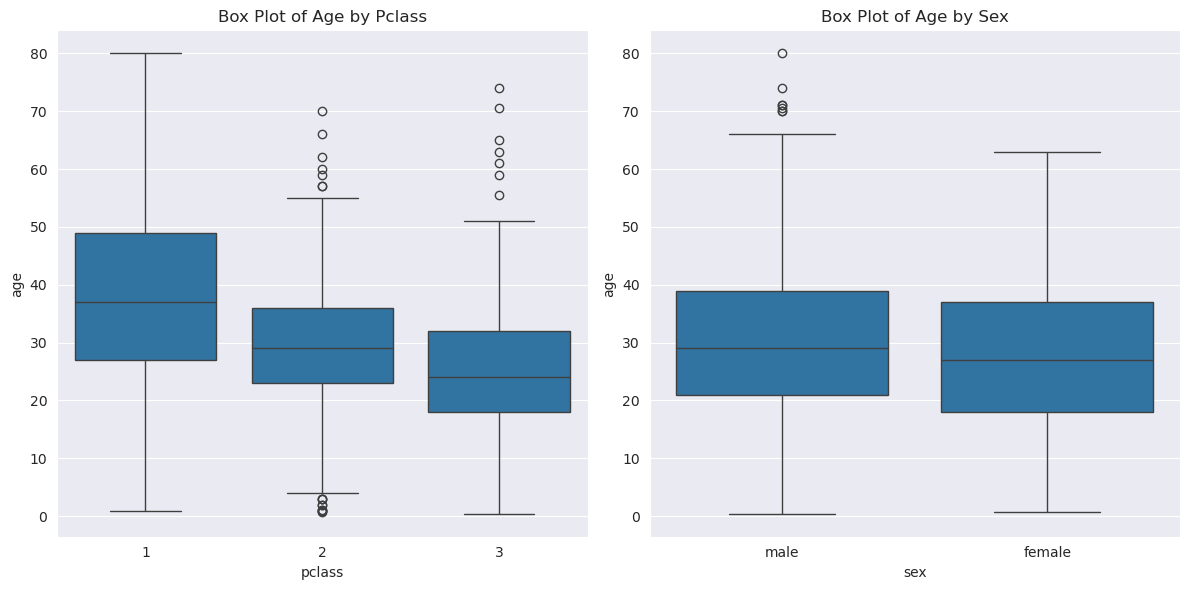

In [79]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)

sns.boxplot(x='pclass', y='age', data=df)
plt.title('Box Plot of Age by Pclass')



plt.subplot(1, 2, 2)

sns.boxplot(x='sex', y='age', data=df)
plt.title('Box Plot of Age by Sex')


plt.tight_layout()
plt.show()


In [80]:
average_age_male_C1 = df[(df['pclass'] == 1) & (df['sex']=="male")]['age'].mean()
average_age_male_C2 = df[(df['pclass'] == 2) & (df['sex']=="male")]['age'].mean()
average_age_male_C3 = df[(df['pclass'] == 3) & (df['sex']=="male")]['age'].mean()
print(average_age_male_C1)
print(average_age_male_C2)
print(average_age_male_C3)

41.28138613861386
30.74070707070707
26.507588932806325


In [81]:
average_age_male_C1 = df[(df['pclass'] == 1) & (df['sex']=="male") & (df['who']!="child")]['age'].mean()
average_age_male_C2 = df[(df['pclass'] == 2) & (df['sex']=="male") & (df['who']!="child")]['age'].mean()
average_age_male_C3 = df[(df['pclass'] == 3) & (df['sex']=="male") & (df['who']!="child")]['age'].mean()
print(average_age_male_C1)
print(average_age_male_C2)
print(average_age_male_C3)

42.38265306122449
33.58888888888889
28.995555555555555


In [82]:
average_age_female_C1 = df[(df['pclass'] == 1)& (df['sex']=="female")]['age'].mean()
average_age_female_C2 = df[(df['pclass'] == 2)& (df['sex']=="female")]['age'].mean()
average_age_female_C3 = df[(df['pclass'] == 3)& (df['sex']=="female")]['age'].mean()
print(average_age_female_C1)
print(average_age_female_C2)
print(average_age_female_C3)

34.61176470588235
28.722972972972972
21.75


In [83]:
average_age_female_C1 = df[(df['pclass'] == 1)& (df['sex']=="female") & (df['who']!="child")]['age'].mean()
average_age_female_C2 = df[(df['pclass'] == 2)& (df['sex']=="female") & (df['who']!="child")]['age'].mean()
average_age_female_C3 = df[(df['pclass'] == 3)& (df['sex']=="female") & (df['who']!="child")]['age'].mean()
print(average_age_female_C1)
print(average_age_female_C2)
print(average_age_female_C3)

35.5
32.1796875
27.854166666666668


In [84]:
tmp = df[(df['pclass'] == 1)& (df['sex']=="male") & (df['who']!="child")]['age'].std()
print(tmp)

13.946104104473966


In [85]:

df.loc[(df['sex'] == 'male') & (df['pclass'] == 1) & (df['age'].isnull()), 'age'] = average_age_male_C1
df.loc[(df['sex'] == 'male') & (df['pclass'] == 2) & (df['age'].isnull()), 'age'] = average_age_male_C2
df.loc[(df['sex'] == 'male') & (df['pclass'] == 3) & (df['age'].isnull()), 'age'] = average_age_male_C3


df.loc[(df['sex'] == 'female') & (df['pclass'] == 1) & (df['age'].isnull()), 'age'] = average_age_female_C1
df.loc[(df['sex'] == 'female') & (df['pclass'] == 2) & (df['age'].isnull()), 'age'] = average_age_female_C2
df.loc[(df['sex'] == 'female') & (df['pclass'] == 3) & (df['age'].isnull()), 'age'] = average_age_female_C3



In [86]:
average_age = df['age'].median()
average_age_male = df[df['sex'] == 'male']['age'].mean()
average_age_female = df[df['sex'] == 'female']['age'].mean()
print(f"Median age: {average_age}, Average male age: {int(average_age_male)}, Average female age: {int(average_age_female)}")
#Average age: 28.0, Average male age: 30, Average female age: 27
# Median age: 28.995555555555555, Average male age: 30, Average female age: 28

Median age: 28.995555555555555, Average male age: 30, Average female age: 28


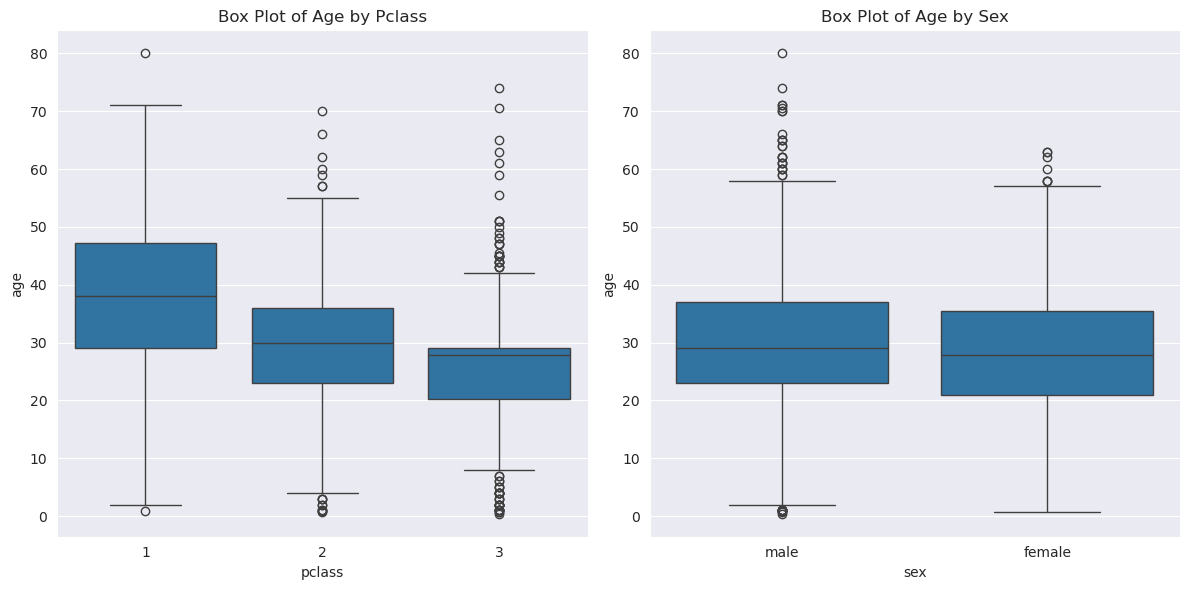

In [87]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)

sns.boxplot(x='pclass', y='age', data=df)
plt.title('Box Plot of Age by Pclass')



plt.subplot(1, 2, 2)

sns.boxplot(x='sex', y='age', data=df)
plt.title('Box Plot of Age by Sex')


plt.tight_layout()
plt.show()


In [88]:
average_age = df['age'].median()
print(f"Average age: {average_age}")

Average age: 28.995555555555555


In [89]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [90]:
df.dropna(inplace = True)

In [91]:
average_age = df['age'].median()
average_age_male = df[df['sex'] == 'male']['age'].mean()
average_age_female = df[df['sex'] == 'female']['age'].mean()
print(f"Median age: {average_age}, Average male age: {int(average_age_male)}, Average female age: {int(average_age_female)}")
# Average age: 28.0, Average male age: 30, Average female age: 27 #age not applied
# Median age: 28.995555555555555, Average male age: 30, Average female age: 28 #age applied using mean for sex and no children
#Median age: 36.0, Average male age: 38, Average female age: 32 # dropped all missing values

Median age: 28.995555555555555, Average male age: 30, Average female age: 28


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


<AxesSubplot: xlabel='survived', ylabel='count'>

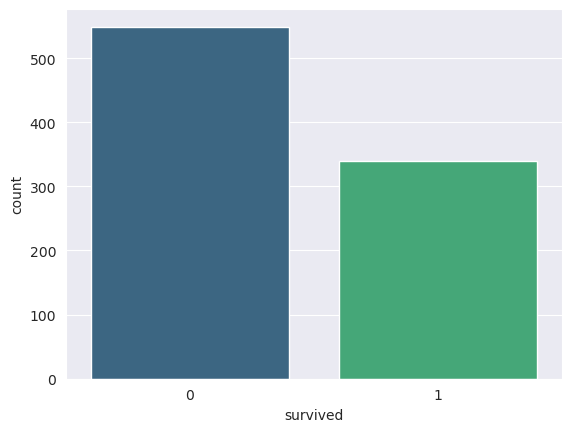

In [93]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")

In [94]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<AxesSubplot: xlabel='survived', ylabel='count'>

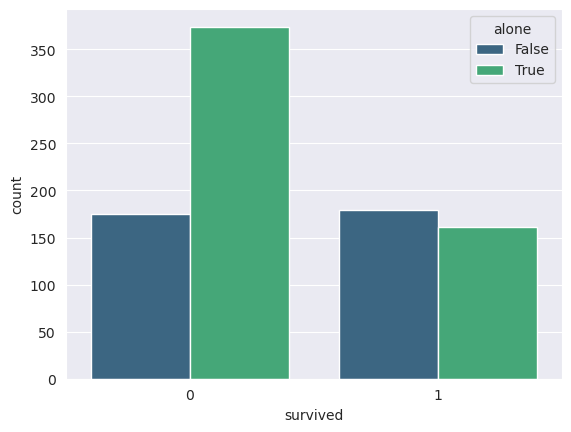

In [95]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "alone", data = df, palette = "viridis")

<AxesSubplot: xlabel='survived', ylabel='count'>

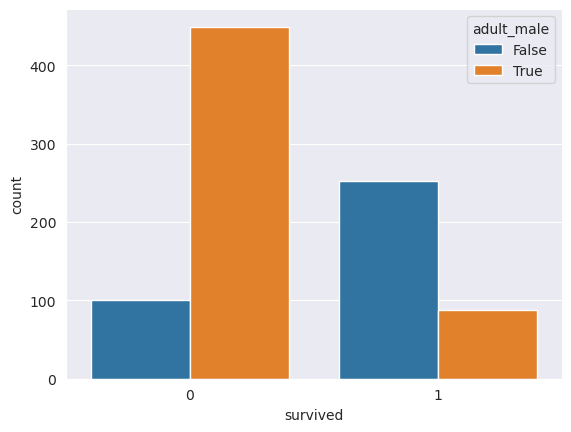

In [96]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "adult_male", data = df)

<AxesSubplot: xlabel='survived', ylabel='count'>

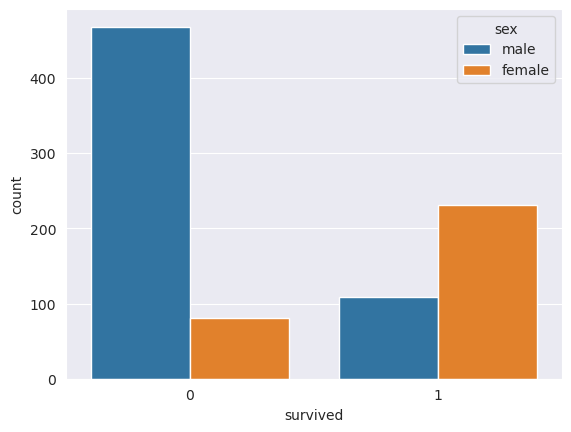

In [97]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "sex", data = df)

<AxesSubplot: xlabel='survived', ylabel='count'>

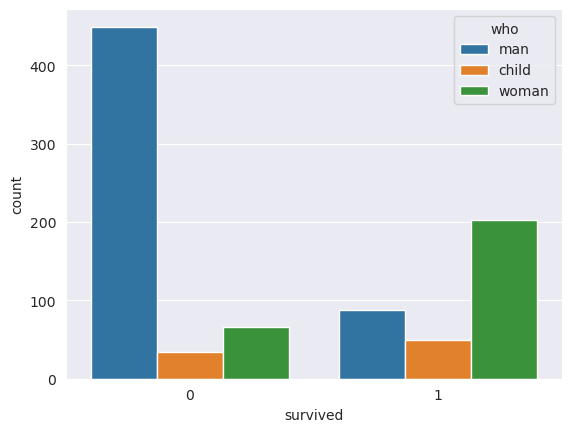

In [98]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "who", data = df)

<AxesSubplot: xlabel='survived', ylabel='count'>

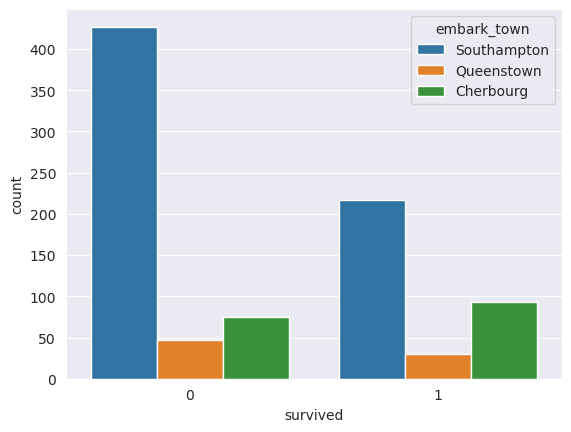

In [99]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "embark_town", data = df)

<AxesSubplot: xlabel='embark_town', ylabel='count'>

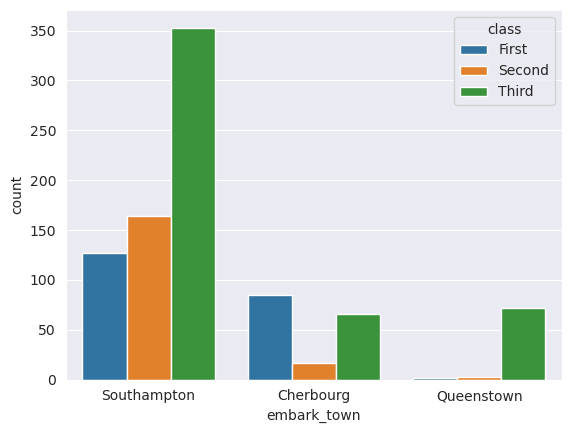

In [100]:
sns.countplot(x = "embark_town", hue= "class", data = df)

In [101]:
df.drop(["sibsp", "parch"], axis = 1, inplace = True)

In [102]:
df.head()

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,8.0500,S,Third,man,True,Southampton,no,True


In [103]:
sex = pd.get_dummies(df["sex"], drop_first = True)
who = pd.get_dummies(df["who"])
adult_male = pd.get_dummies(df["adult_male"], drop_first = True)
embark_town = pd.get_dummies(df["embark_town"], drop_first = True)
print(df["who"].unique())
print(df["alone"])

['man' 'woman' 'child']
0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: alone, Length: 889, dtype: bool


In [104]:
df = pd.concat([df, sex, who, adult_male, embark_town], axis = 1)

In [129]:
classs= pd.get_dummies(df["class"])
df = pd.concat([df, classs], axis = 1)
df.drop(["class"], axis = 1, inplace = True)

In [130]:
df.head()

,survived,pclass,age,fare,alive,alone,male,child,man,woman,True,Queenstown,Southampton,First,Second,Third,First,Second,Third
0,0,3,22.0,7.2500,no,False,True,False,True,False,True,False,True,False,False,True,False,False,True
1,1,1,38.0,71.2833,yes,False,False,False,False,True,False,False,False,True,False,False,True,False,False
2,1,3,26.0,7.9250,yes,True,False,False,False,True,False,False,True,False,False,True,False,False,True
3,1,1,35.0,53.1000,yes,False,False,False,False,True,False,False,True,True,False,False,True,False,False
4,0,3,35.0,8.0500,no,True,True,False,True,False,True,False,True,False,False,True,False,False,True


In [106]:
df.drop(["sex", "who", "adult_male", "embark_town", "embarked"], axis = 1, inplace = True)

In [107]:
df.head()

,survived,pclass,age,fare,class,alive,alone,male,child,man,woman,True,Queenstown,Southampton
0,0,3,22.0,7.2500,Third,no,False,True,False,True,False,True,False,True
1,1,1,38.0,71.2833,First,yes,False,False,False,False,True,False,False,False
2,1,3,26.0,7.9250,Third,yes,True,False,False,False,True,False,False,True
3,1,1,35.0,53.1000,First,yes,False,False,False,False,True,False,False,True
4,0,3,35.0,8.0500,Third,no,True,True,False,True,False,True,False,True


In [108]:
df.drop(["man","True"], axis = 1, inplace = True)

KeyError: "['True'] not found in axis"

In [ ]:
plt.figure(figsize = (10, 3))
sns.heatmap(df.corr(), annot = True) #will not work 

**Modelling** WIP

In [109]:
from sklearn.model_selection import train_test_split

In [148]:
X = df.drop("survived", axis = 1)
X = X.rename(str,axis="columns") #needed to fix an error with column names
y = df["survived"]
X.head()


,pclass,age,fare,alone,male,child,man,woman,True,Queenstown,Southampton,First,Second,Third,First,Second,Third
0,3,22.0,7.2500,False,True,False,True,False,True,False,True,False,False,True,False,False,True
1,1,38.0,71.2833,False,False,False,False,True,False,False,False,True,False,False,True,False,False
2,3,26.0,7.9250,True,False,False,False,True,False,False,True,False,False,True,False,False,True
3,1,35.0,53.1000,False,False,False,False,True,False,False,True,True,False,False,True,False,False
4,3,35.0,8.0500,True,True,False,True,False,True,False,True,False,False,True,False,False,True


In [149]:
df.head()

,survived,pclass,age,fare,alone,male,child,man,woman,True,Queenstown,Southampton,First,Second,Third,First,Second,Third
0,0,3,22.0,7.2500,False,True,False,True,False,True,False,True,False,False,True,False,False,True
1,1,1,38.0,71.2833,False,False,False,False,True,False,False,False,True,False,False,True,False,False
2,1,3,26.0,7.9250,True,False,False,False,True,False,False,True,False,False,True,False,False,True
3,1,1,35.0,53.1000,False,False,False,False,True,False,False,True,True,False,False,True,False,False
4,0,3,35.0,8.0500,True,True,False,True,False,True,False,True,False,False,True,False,False,True


In [150]:
df.drop(["alive"], axis = 1, inplace = True)

KeyError: "['alive'] not found in axis"

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
lm_model = LogisticRegression()

In [154]:
lm_model.fit(X_train, y_train)

LogisticRegression()

In [155]:
lm_model.intercept_

array([0.96780088])

In [156]:
coef_param = pd.DataFrame(lm_model.coef_, index = X.columns, columns = ["Coefficient"])
coef_param

ValueError: Shape of passed values is (1, 17), indices imply (17, 1)

In [ ]:
y_pred = lm_model.predict(X_test)

In [ ]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [157]:
compare.sample(10)

NameError: name 'compare' is not defined

In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    return print("r2_score:", SCORE, "\n","mae:", MAE, "\n","mse:",MSE, "\n","rmse:",RMSE)

In [ ]:
evaluation_metrics(y_test, y_pred)

In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.regressor import PredictionError

# Instantiate the visualizer
visualizer = PredictionError(lm_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show() # Finalize and render the figure

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the visualizer
visualizer = ResidualsPlot(lm_model)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data

visualizer.show() # Finalize and render the figure

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)
y_pred

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [116]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [117]:
cnf_matrix = confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [118]:
cnf_matrix

NameError: name 'cnf_matrix' is not defined

In [119]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

NameError: name 'y_pred' is not defined

In [120]:
compare.sample(10)

NameError: name 'compare' is not defined